## Tutorial - Run Code on Real Datasets (Lake Erie)

#### The Lake Erie Data can be found in the Sample_Input folder. This data is a result of VHIP being run on samples from Lake Erie. The samples were originally collected to study cyanobacterial harmful algae blooms in the water. Harmful algal blooms are the rapid growth of algae or cyanobacteria in water that can harm people, animals, or the environment. Cyanobacterial harmful algae blooms (cHABs) are specific to freshwater and are characterized by their blue-green appearance. The data from Lake Erie was collected by AJ Wing and the analysis was run by Eric Bastien and Evelyn Faust. VHIP 2.0 aims to predict which viruses interact which hosts. The output is this prediction data from the site at varying time points. Moving forward, we hope to get access to data for a longer span of time and run this analysis on each of those additional time points. This will allow us to address another question: "How do patterns in predicted virus-host interactions change over time?".


#### Load the packages

In [37]:
%reload_ext autoreload
%autoreload 2

In [38]:
from VirusHostNetworkAnalysis.prediction_matrix import PredictionMatrix
from VirusHostNetworkAnalysis.null_model import ER
from VirusHostNetworkAnalysis.null_model import ConfigurationModel
from VirusHostNetworkAnalysis.properties import BipartiteGraph

#### Plot the heatmaps for the data from August 4th and September 29th to compare how it changed during that period.

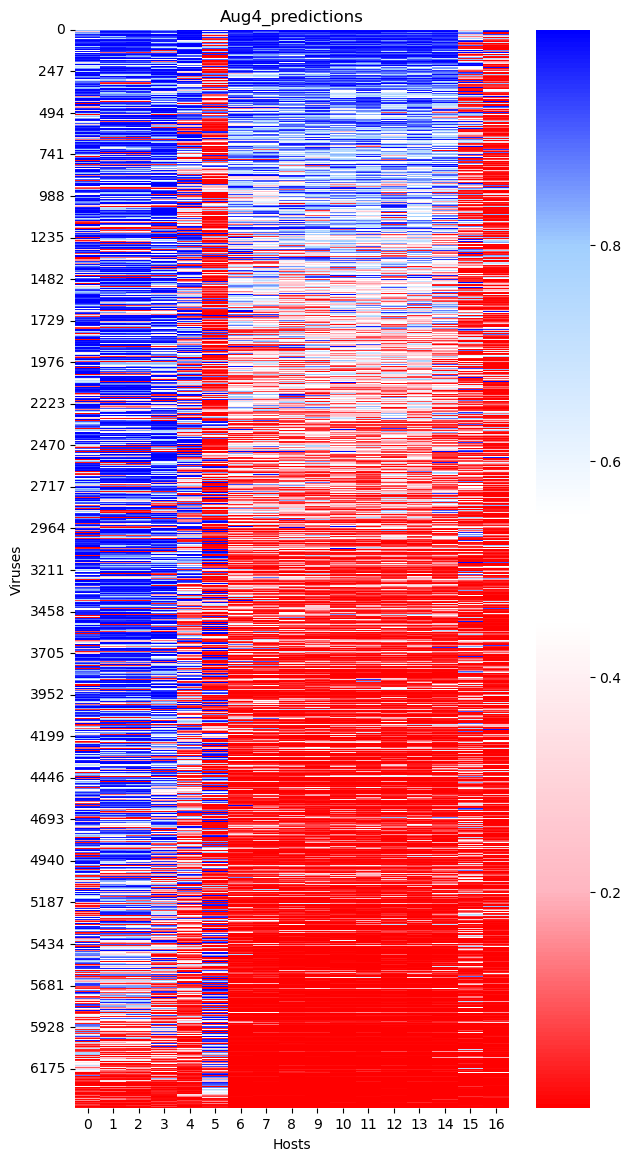

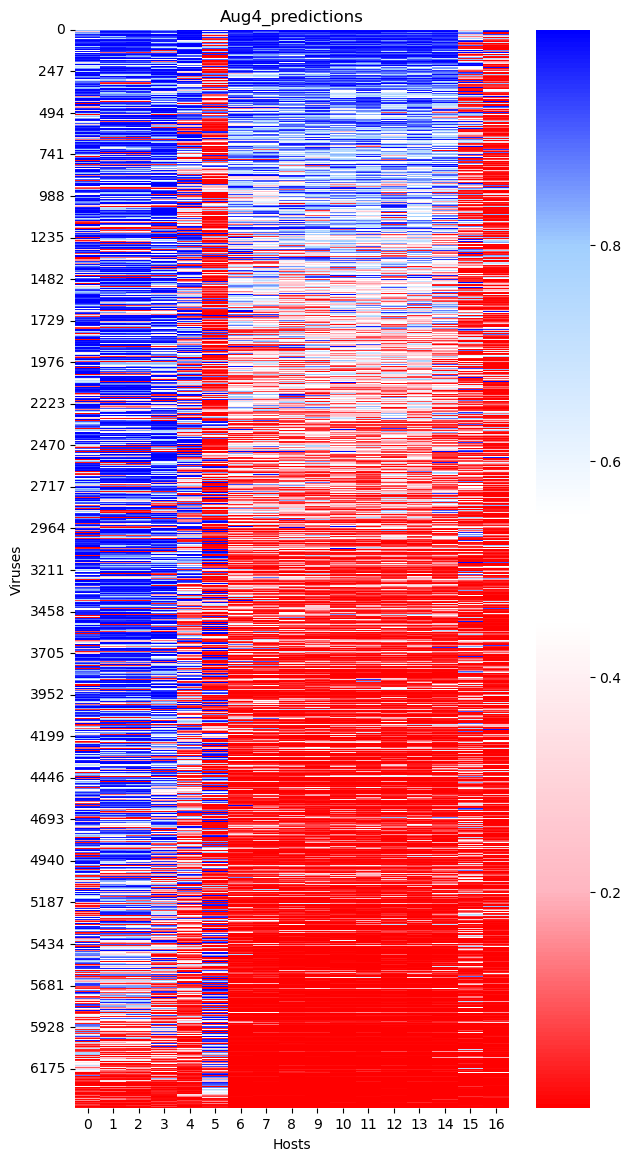

In [39]:
aug4 = PredictionMatrix("Sample_Input/Aug4_predictions.tsv", True)
sep29 = PredictionMatrix("Sample_Input/Sep29_predictions.tsv", True)

aug4.make_rectangular_matrix()
aug4_properties = BipartiteGraph(aug4)
aug4_properties.plot_heatmap()

sep29.make_rectangular_matrix()
sep29_properties = BipartiteGraph(aug4)
sep29_properties.plot_heatmap()

In [28]:
aug4.virus_host_array.shape

(6408, 17)

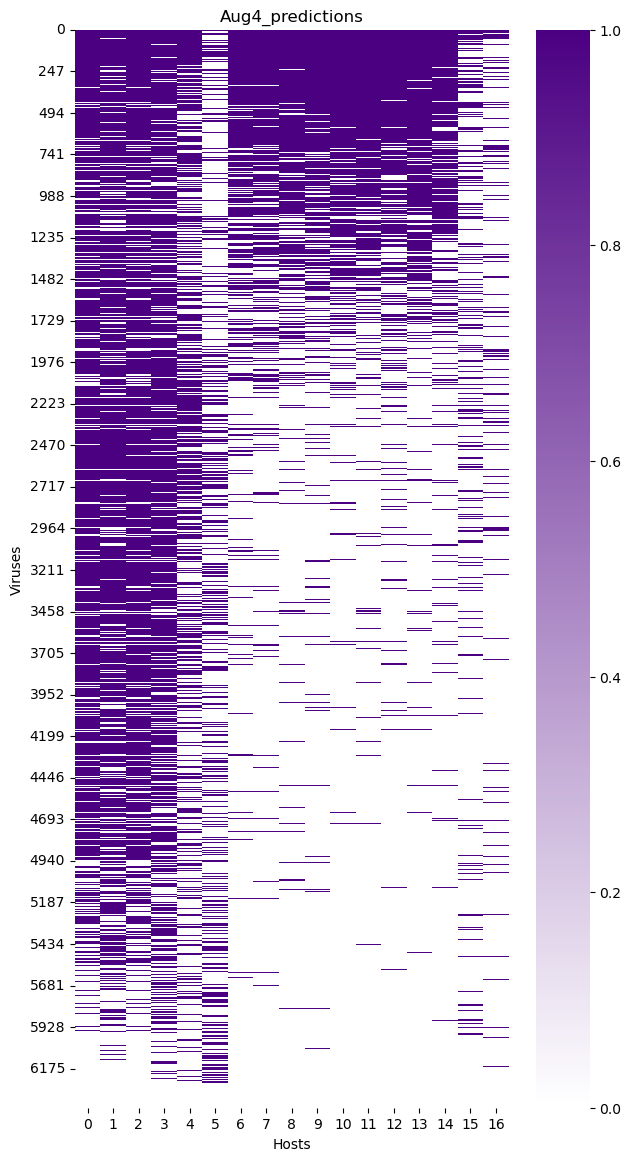

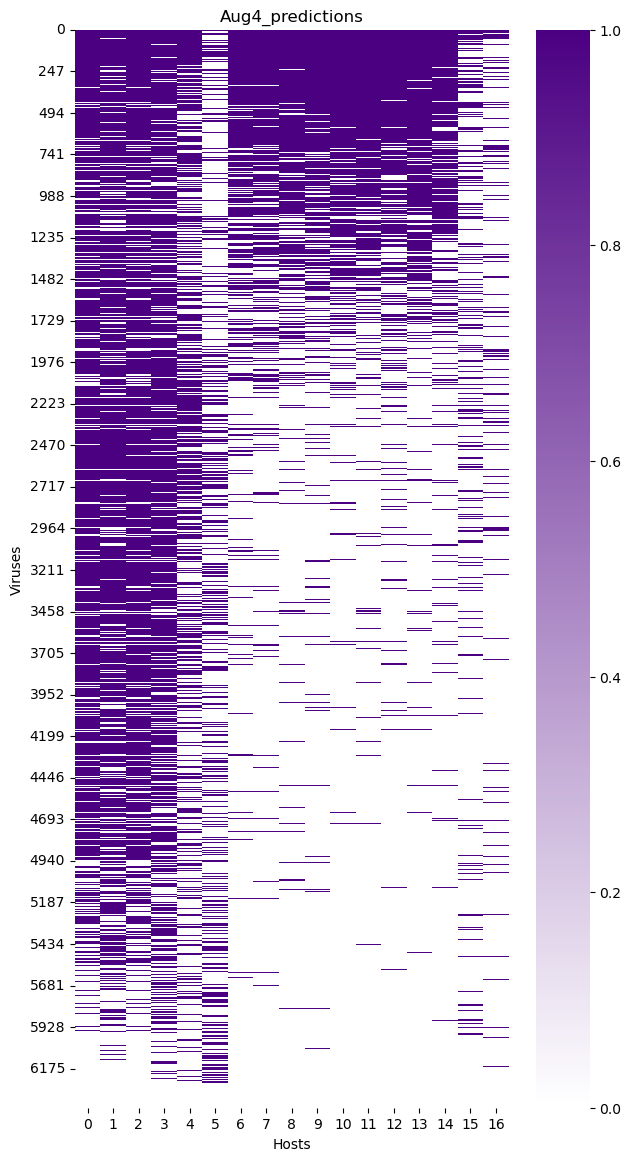

In [40]:
aug4 = PredictionMatrix("Sample_Input/Aug4_predictions.tsv")
sep29 = PredictionMatrix("Sample_Input/Sep29_predictions.tsv")

aug4.make_rectangular_matrix()
aug4_properties = BipartiteGraph(aug4)
aug4_properties.plot_heatmap()

sep29.make_rectangular_matrix()
sep29_properties = BipartiteGraph(aug4)
sep29_properties.plot_heatmap()


In [42]:
aug4_properties.make_square_matrix()
print(aug4_properties.virus_host_array_square)

[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [7]:
aug4_properties.calculate_modularity()
sep29_properties.calculate_modularity()

Modularity:  0.22154544916730867
Modularity:  0.22154544916730867


0.22154544916730867

In [60]:
import sys
sys.getsizeof(aug4.virus_host_array)

128

#### In the heatmaps above, there are some notable differences. First, the August data seems to have some modularity present (indicated by the gap at the top of column 5). This gap is not present in September. Instead, the September dataset appears to be mostly nested.

#### Next, we will make ER and configuration models for the August and September data. This will serve as null models that can be compared to our actual graphs. Pass in the length of the viruses as row number, length of hosts as column number, and any desired p cutoff value. We will use 0.5 because this is the cutoff used for the VHIP analysis. This data is too large to display graphs for, so instead we will show the degree distributions.

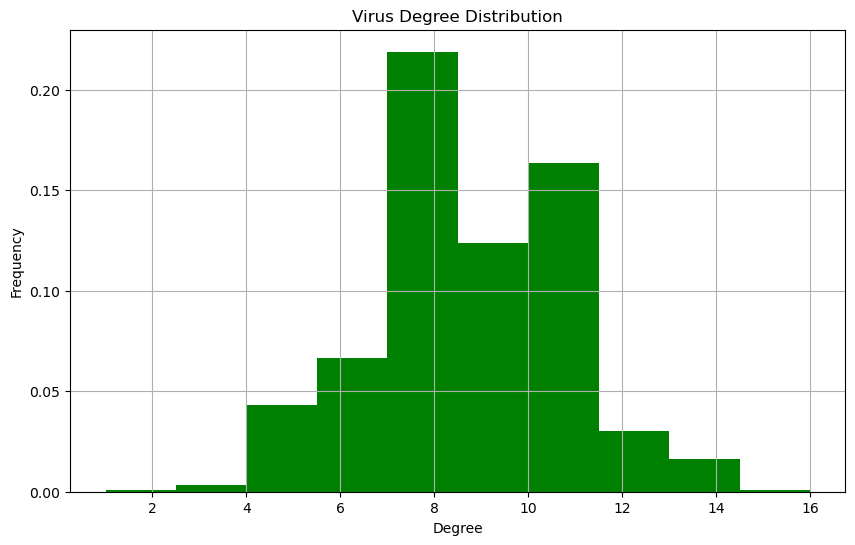

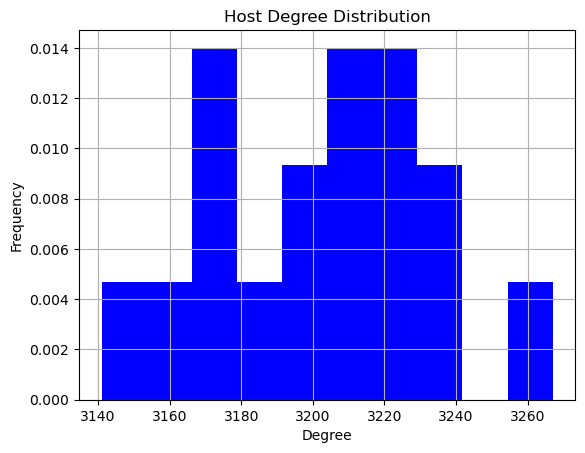

In [25]:
aug4_er = ER(aug4, 0.5)
aug4_er.fill_ER_graph()
aug4_er_graph = BipartiteGraph(aug4_er)
aug4_er_graph.plot_degree_distribution()


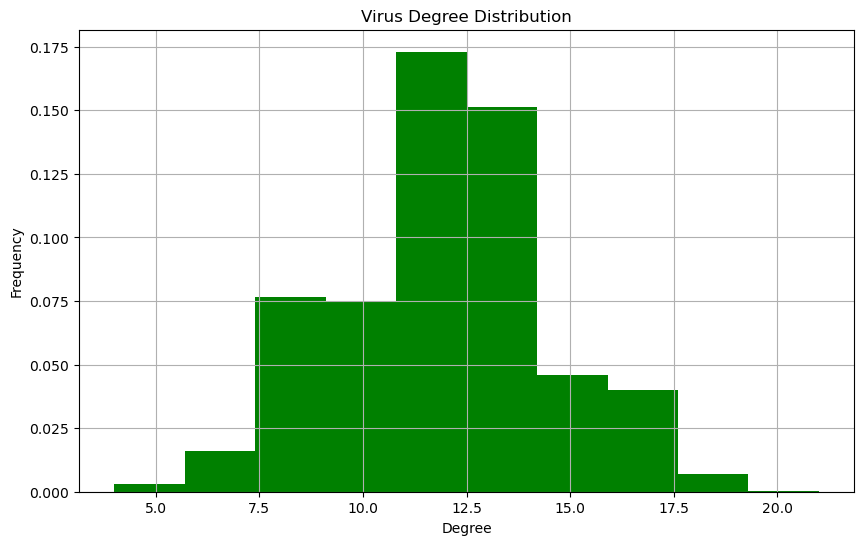

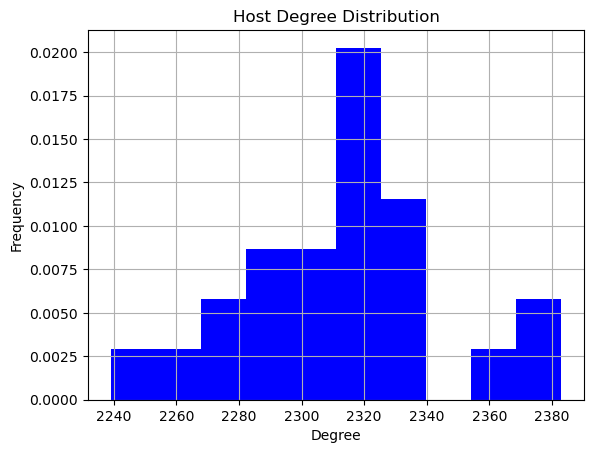

In [26]:
sep29_er = ER(sep29, 0.5)
sep29_er.fill_ER_graph()
sep29_er_graph = BipartiteGraph(sep29_er)
sep29_er_graph.plot_degree_distribution()

Swapping edges: 14876it [00:00, 74879.86it/s]                          1.07it/s]


Successful runs:  10000 Failed runs:  4876


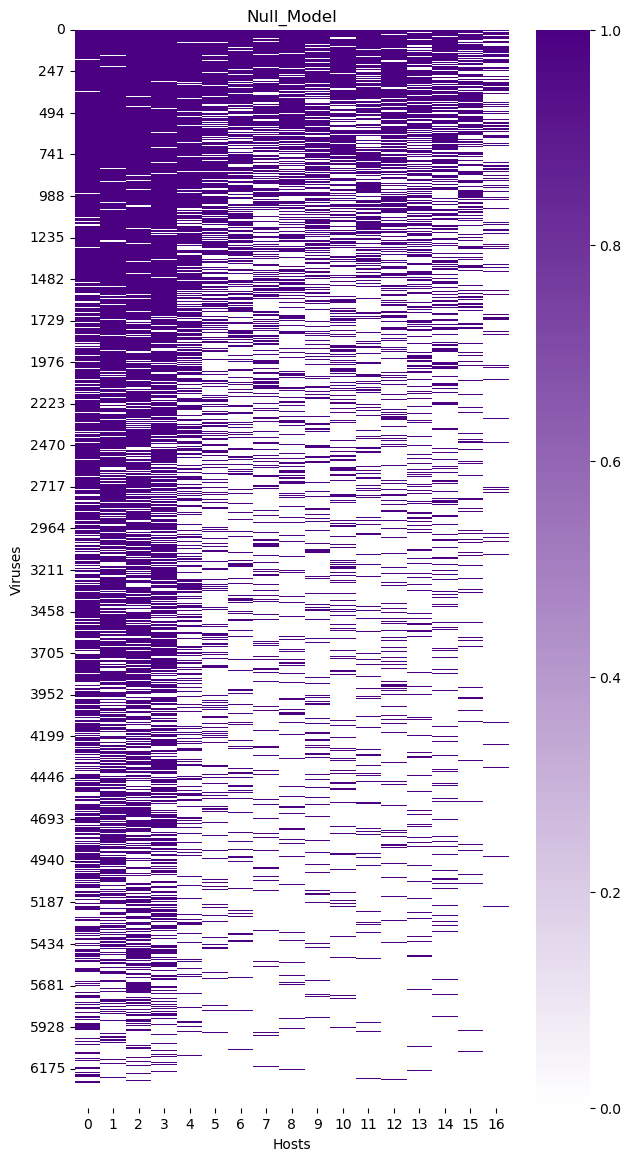

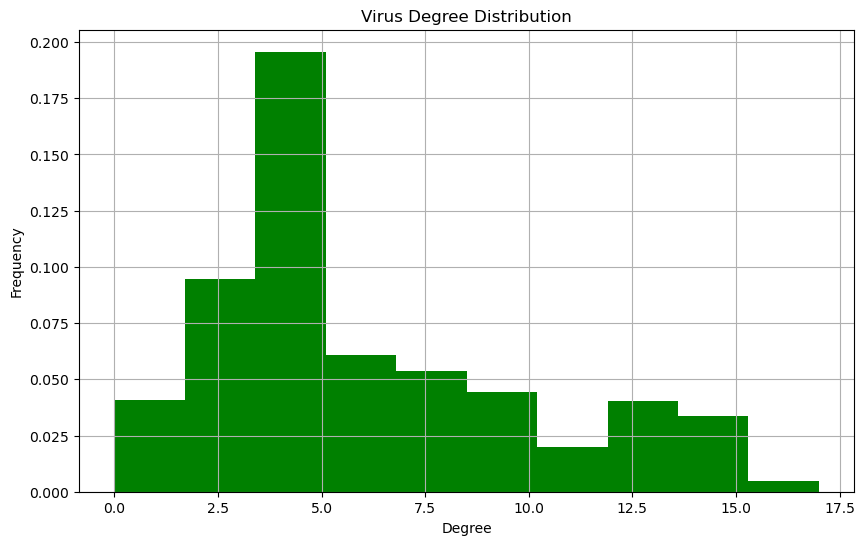

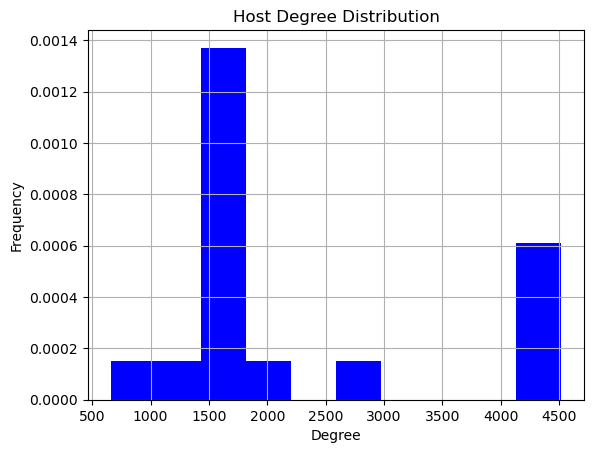

In [27]:
aug4_cm = ConfigurationModel(aug4)
aug4_cm.bootstrap_stats(10000)
aug4_cm_properties = BipartiteGraph(aug4_cm)
aug4_cm_properties.plot_heatmap()
aug4_cm_properties.plot_degree_distribution()
# nodf = aug4_cm_properties.run_parallel(8)
# print(nodf)


Swapping edges: 136443it [00:02, 50685.60it/s]                           2.84it/s]


Successful runs:  100000 Failed runs:  36443


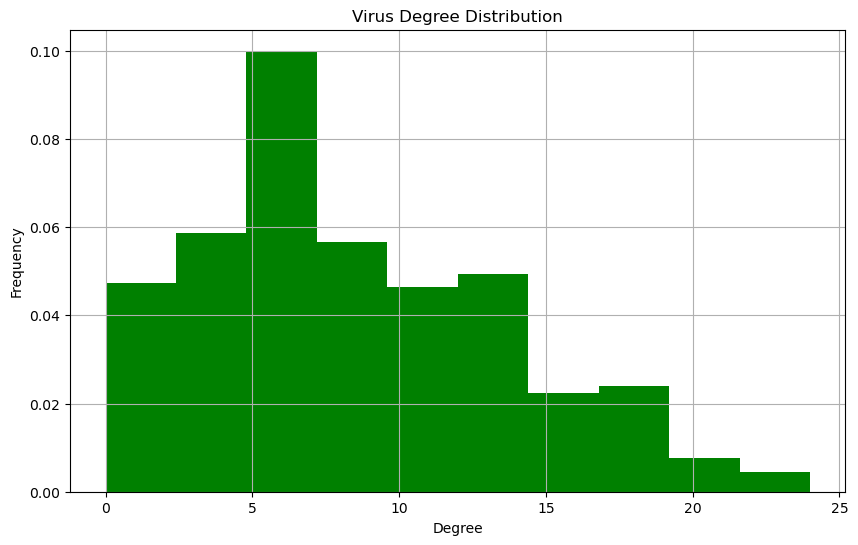

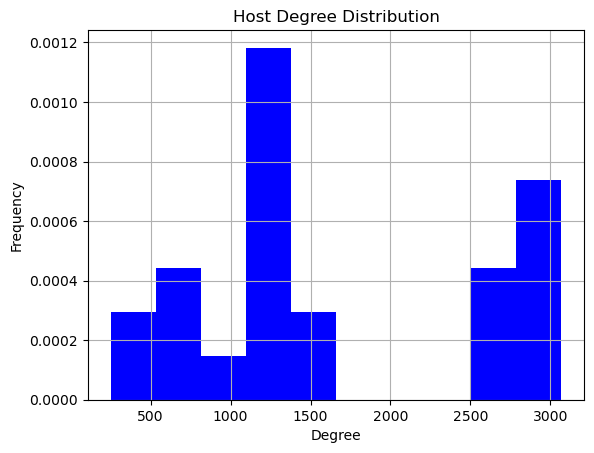

In [23]:
sep29_cm = ConfigurationModel(sep29)
sep29_cm.bootstrap_stats(100000)
sep29_cm_properties = BipartiteGraph(sep29_cm)
sep29_cm_properties.plot_degree_distribution()

### Centrality measurements for the Configuration Model

Swapping edges: 148144it [00:02, 70259.70it/s]                           2.75it/s]


Successful runs:  100000 Failed runs:  48144
eigen done


Swapping edges: 147592it [00:02, 70471.82it/s]                           6.66it/s]


Successful runs:  100000 Failed runs:  47592
eigen done


Swapping edges: 147378it [00:02, 71270.03it/s]                           6.70it/s]


Successful runs:  100000 Failed runs:  47378
eigen done


Swapping edges: 146998it [00:02, 70925.36it/s]                           1.87it/s]


Successful runs:  100000 Failed runs:  46998
eigen done


Swapping edges: 147933it [00:02, 67871.84it/s]                           2.70it/s]


Successful runs:  100000 Failed runs:  47933
eigen done


Swapping edges: 147436it [00:02, 69479.76it/s]                           8.27it/s]


Successful runs:  100000 Failed runs:  47436
eigen done


Swapping edges: 147501it [00:02, 65267.49it/s]                           0.04it/s]


Successful runs:  100000 Failed runs:  47501
eigen done


Swapping edges: 147979it [00:02, 70172.66it/s]                           9.25it/s]


Successful runs:  100000 Failed runs:  47979
eigen done


Swapping edges: 147631it [00:02, 68337.06it/s]                           6.26it/s]


Successful runs:  100000 Failed runs:  47631
eigen done


Swapping edges: 147995it [00:02, 70348.86it/s]                           5.01it/s]


Successful runs:  100000 Failed runs:  47995
eigen done


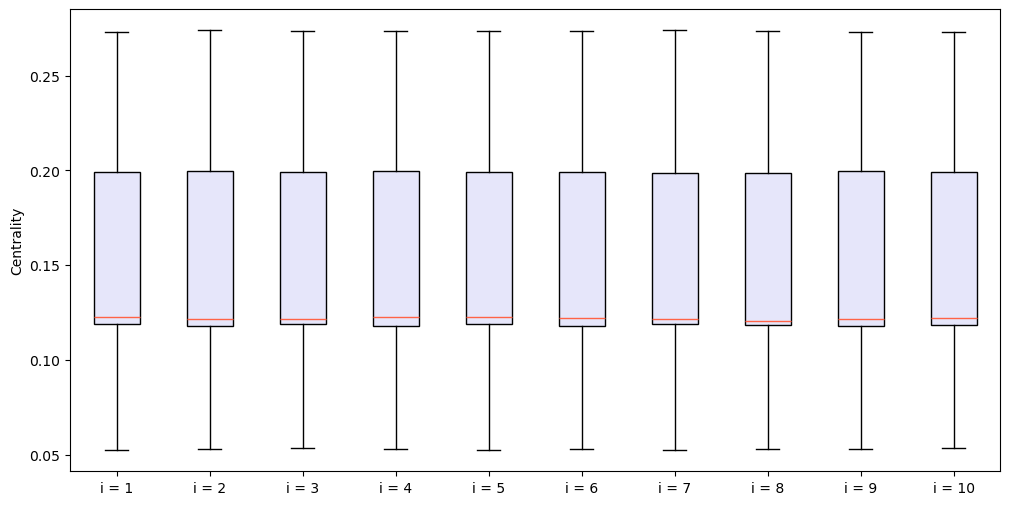

In [30]:
import matplotlib.pyplot as plt
import numpy as np

aug4_config = ConfigurationModel(aug4)
centrality_virus = []
centrality_host = []
for i in range(10):
    # 10,000,000 swaps
    aug4_config.bootstrap_stats(100000)
    aug4_closeness_plot = BipartiteGraph(aug4_config)
    aug4_closeness_plot.initialize_graph()
    aug4_closeness_plot.calculate_centrality(1000, 'eigenvector')
    centrality_virus.append(aug4_closeness_plot.eigenvector_virus)
    centrality_host.append(aug4_closeness_plot.eigenvector_host)

# Make a boxplot for the eigenvector centrality for viruses
np.random.seed(19680801)
labels = ['i = 1', 'i = 2', 'i = 3', 'i = 4', 'i = 5', 'i = 6', 'i = 7', 'i = 8', 'i = 9', 'i = 10']
colors = ['lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender', 'lavender']

# Make the boxplot taller
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Centrality')

# Convert centrality_virus (list of dictionaries) to a list of lists
centrality_host_values = [list(d.values()) for d in centrality_host]
centrality_virus_values = [list(d.values()) for d in centrality_virus]

bplot = ax.boxplot(centrality_host_values,
                   patch_artist=True)  # fill with color

# change median line color
for median in bplot['medians']:
    median.set(color='tomato', linewidth=1)


# Set the x-tick labels
ax.set_xticklabels(labels)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


plt.show()



eigen done
closeness done
betweenness done


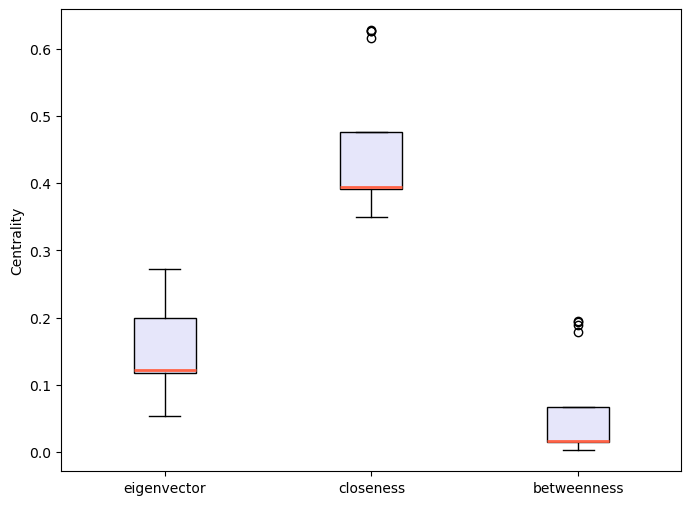

In [31]:
import matplotlib.pyplot as plt
import numpy as np

centrality_virus = []
centrality_host = []
aug4_plot = BipartiteGraph(aug4)
aug4_plot.initialize_graph()
aug4_plot.calculate_centrality(1000, 'eigenvector')
centrality_virus.append(aug4_plot.eigenvector_virus)
centrality_host.append(aug4_plot.eigenvector_host)
aug4_plot.calculate_centrality(1000, 'closeness')
centrality_virus.append(aug4_plot.closeness_virus)
centrality_host.append(aug4_plot.closeness_host)
aug4_plot.calculate_centrality(1000, 'betweenness')
centrality_virus.append(aug4_plot.betweenness_virus)
centrality_host.append(aug4_plot.betweenness_host)

# Make a boxplot for the eigenvector centrality for viruses
np.random.seed(19680801)
labels = ['eigenvector', 'closeness', 'betweenness']
colors = ['lavender', 'lavender', 'lavender']

# Make the boxplot taller
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel('Centrality')

# Convert centrality_virus (list of dictionaries) to a list of lists
centrality_host_values = [list(d.values()) for d in centrality_host]
centrality_virus_values = [list(d.values()) for d in centrality_virus]

bplot = ax.boxplot(centrality_host_values,
                   patch_artist=True)  # fill with color

# change median line color
for median in bplot['medians']:
    median.set(color='tomato', linewidth=2)

# Set the x-tick labels
ax.set_xticklabels(labels)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


plt.show()

Swapping edges: 1501it [00:00, 72467.08it/s]            ?, ?it/s]


Successful runs:  1000 Failed runs:  501
betweenness done


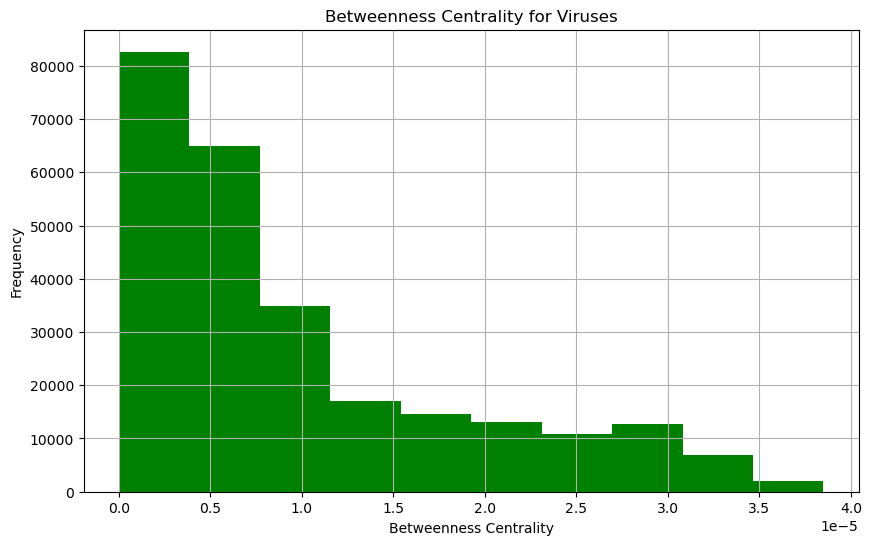

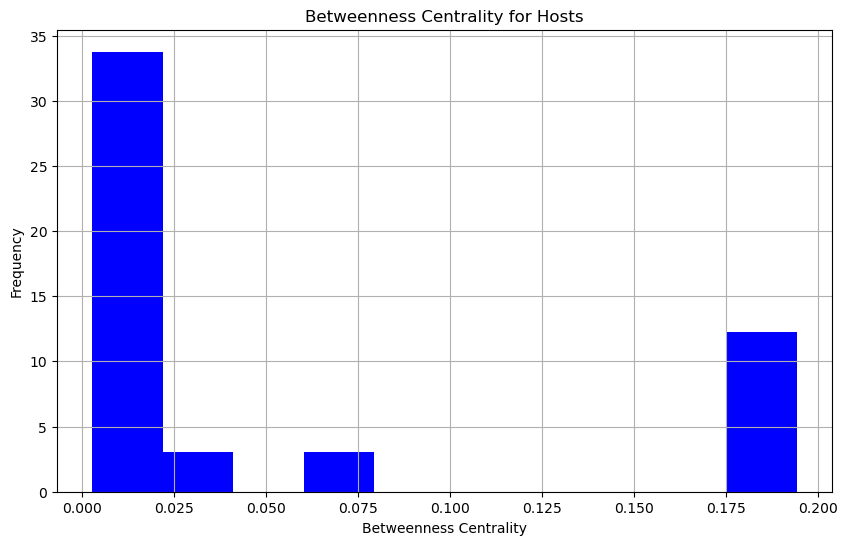

In [33]:
aug4_config = ConfigurationModel(aug4)
aug4_config.bootstrap_stats(1000)
aug4_plots = BipartiteGraph(aug4_config)
aug4_plots.initialize_graph()
aug4_plots.calculate_centrality(1000, 'betweenness')
aug4_plots.plot_betweenness_centrality()

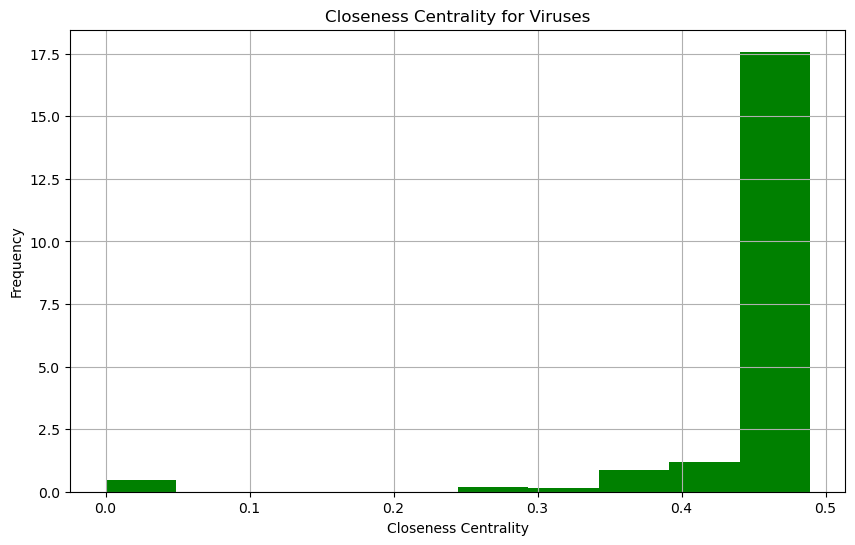

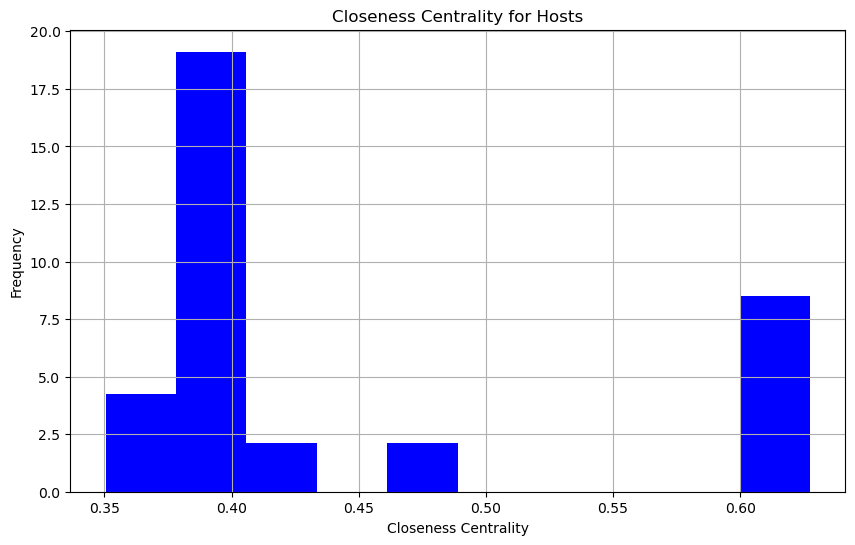

In [ ]:
aug4_plots.calculate_centrality(1000, 'closeness')
aug4_plots.plot_closeness_centrality()

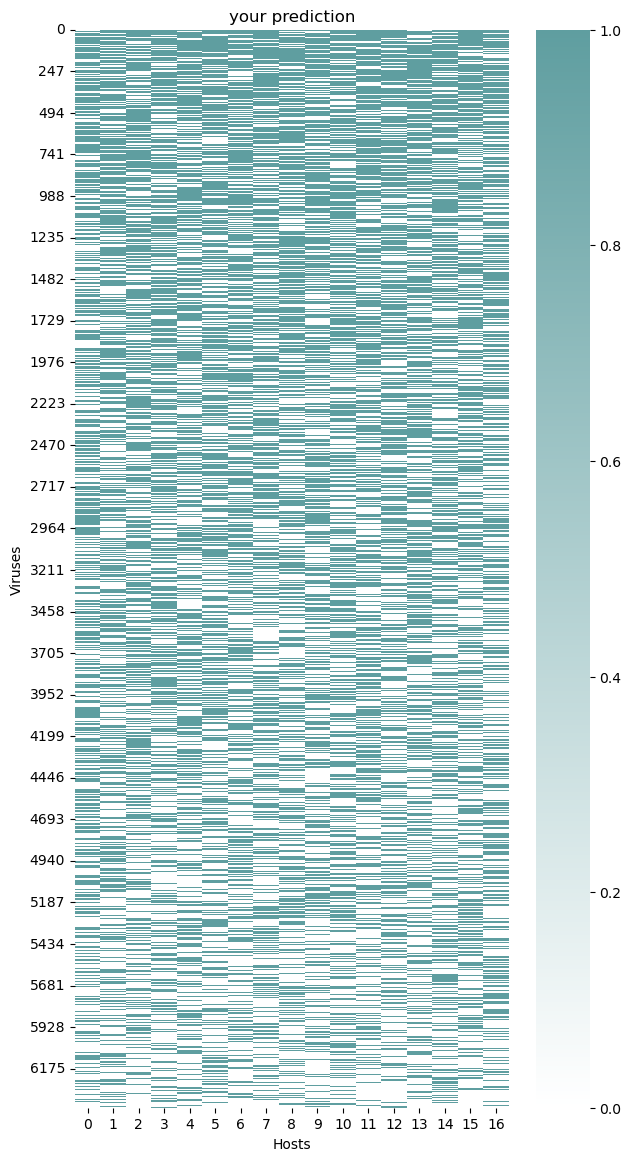

In [ ]:
aug4_er = ER(aug4, 0.5)
aug4_er.fill_ER_graph()
aug4_er_properties = BipartiteGraph(aug4_er)
aug4_er_properties.plot_heatmap()

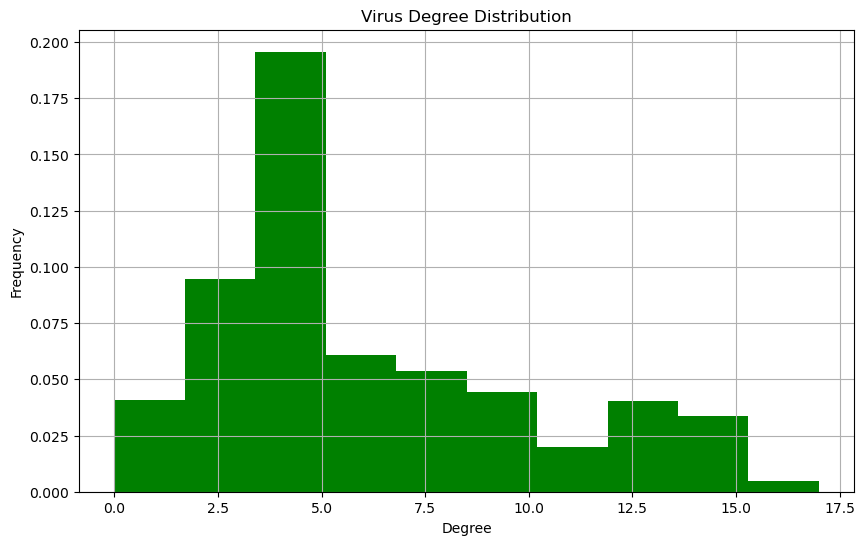

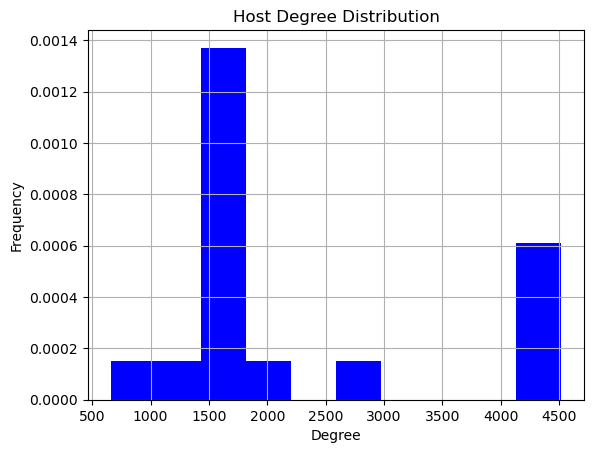

657


In [34]:
# Centrality measurements for actual data
aug4_graph = BipartiteGraph(aug4)
aug4_graph.plot_degree_distribution()
print(min(aug4_graph.calculate_degree()[1]))

In [35]:
aug4_graph.initialize_graph()
aug4_graph.calculate_centrality(1000, 'eigenvector')
aug4_graph.calculate_centrality(1000, 'betweenness')
aug4_graph.calculate_centrality(1000, 'closeness')

eigen done
betweenness done
closeness done


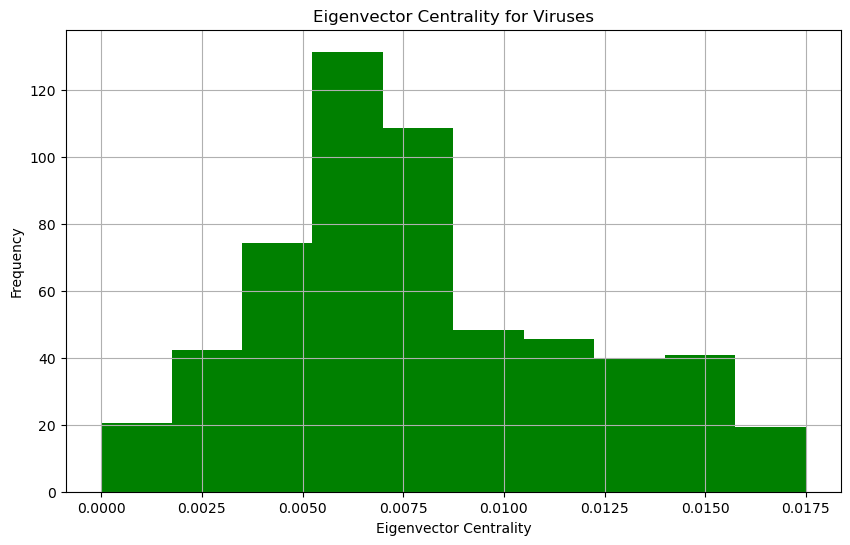

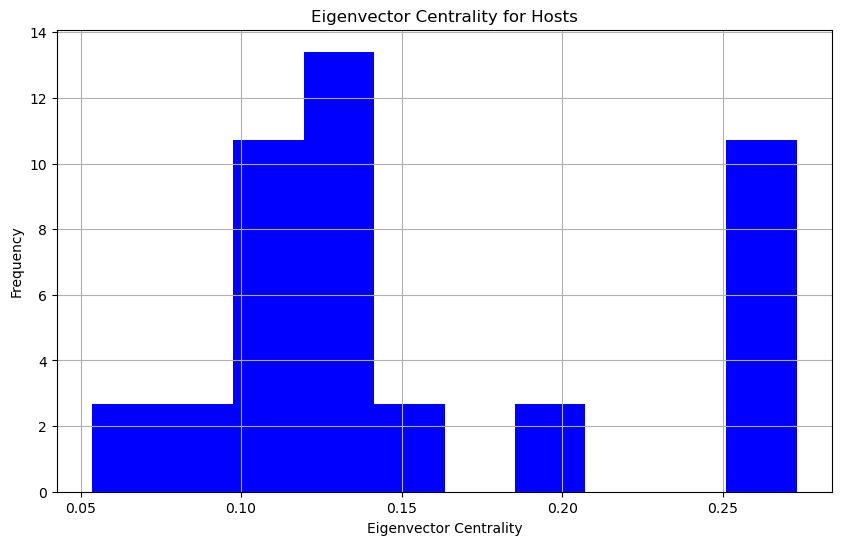

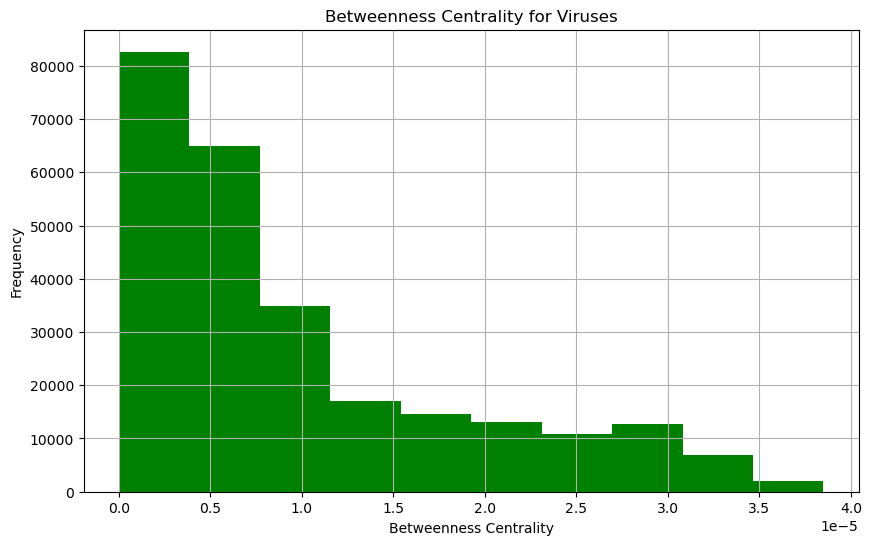

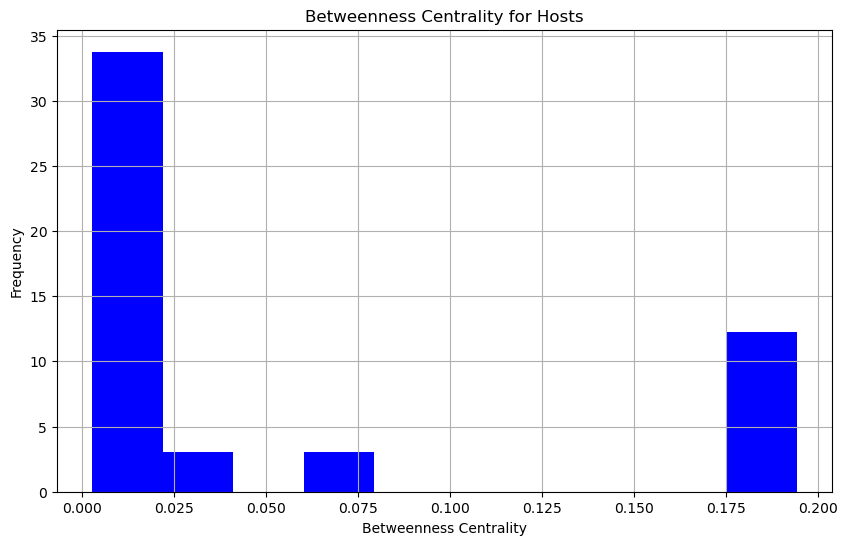

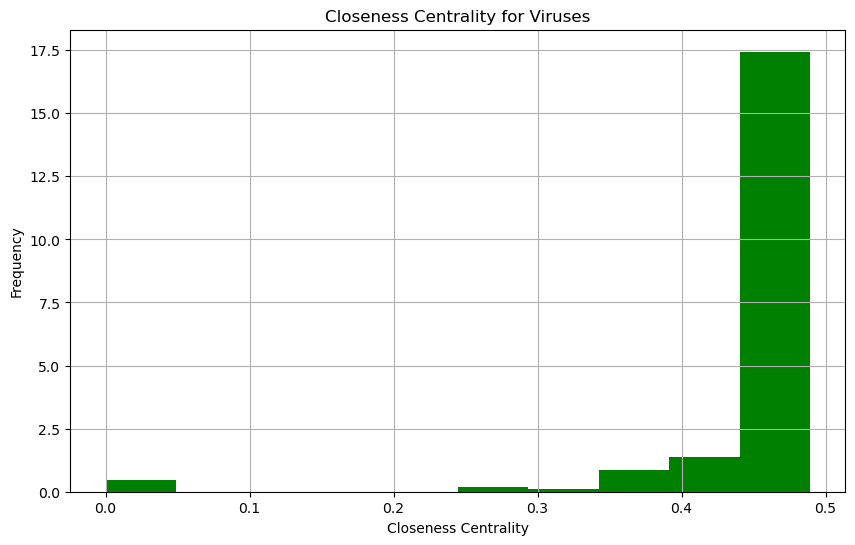

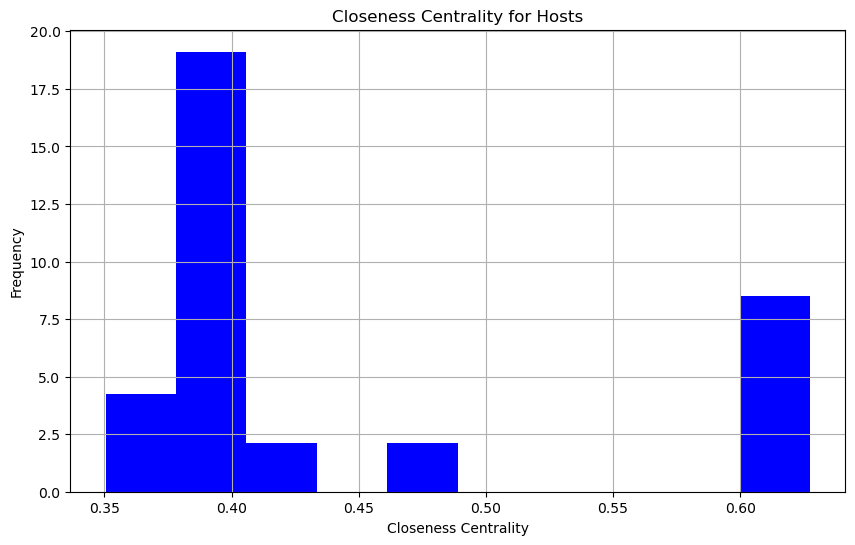

In [36]:
aug4_graph.plot_eigenvector_centrality()
aug4_graph.plot_betweenness_centrality()
aug4_graph.plot_closeness_centrality()